# Machine Learning Final Project

#### Bahar Bateni (810199326)
#### Amir Ranjbar (810199340)


In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

Saving pd_speech_features.csv to pd_speech_features.csv


## Pre-processing

The first step is to pre-process the data. We can think of three types of pre-processing:


1.   Normalization
2.   Balancing classes
3.   Dimension Reduction

But before starting any of these, we need to read the data from the given CSV file and break it into train and test data.

In [13]:
data = pd.read_csv('pd_speech_features.csv') 
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,...,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,...,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.3

In [14]:
data = data.drop(columns=['id'])
shuffled_data = data.sample(frac=1, random_state=0)
train = shuffled_data[:int(len(data) * 0.9)]
test = shuffled_data[int(len(data) * 0.9):]
print('train number: {}, test number: {}'.format(len(train), len(test)))

train number: 680, test number: 76


In [15]:
y_train = train['class'].to_numpy()
X_train = train.drop(columns=['class'])
y_test = test['class'].to_numpy()
X_test = test.drop(columns=['class'])

### Normalization

For normalization, we use Scikit Learn's MinMaxScaler. We can normalize with something more complex, such as L1 or L2 normalizers as well.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:10])

[[0.         0.86676887 0.43818335 ... 0.53074373 0.5542973  0.10780107]
 [0.         0.91396097 0.38086304 ... 0.01981359 0.00987616 0.00365767]
 [1.         0.89088117 0.37455522 ... 0.0104513  0.01888524 0.00160263]
 ...
 [1.         0.94465709 0.21068124 ... 0.35318294 0.36817573 0.52317121]
 [0.         0.93559523 0.48042958 ... 0.16428966 0.1466583  0.0326724 ]
 [1.         0.87730054 0.23106036 ... 0.07854606 0.12306165 0.07665016]]


### Imbalance Dataset

The given dataset is imbalance, meaning that the number of datapoints of different classes are significantly different. In cases like this, we may encounter the accuracy paradox, meaning that while the accuracy may get very high, the actual performance may not be any good. For example, it may classify all the datapoint as the major class and still gets a high accuracy.

One remedy for this problem is using other metrics in addition to accuracy. For example, the Confusion Matrix can show were exactly we classified wrong, and which class we wrongly classified as which. This helps us find out if the classifier is biased toward classifying as the majority class. Also Precision, Recall and F1 Score (that can all be calculated from the Confusion Matrix) are all metrics that can help in this regard. Plotting the ROC curve is also useful.

Another solution can be resampling the dataset. The balancing process can be done either by copying some samples from the minority class, or deleting some from the majority class. Both of these solutions have their own advantages and disadvantages.

This problem can also be approached by generating synthetic samples instead of resampling. This can be done by randomly sampling the attributes from datapoints in the minority class. We can, for example, use Naive Bayes to sample each attribute independently. (One widly used technique for generating samples is Synthetic Minority Oversampling Technique (SMOTE)). In this approach, we can generate new samples that are different from the existing ones, but the non-linear relationship between the samples may not be preserved. For example, if features are correlated, sampling them independently may create unreal or wrong datapoints

In addition to that, we can use algorithms that work better with the imbalance data (like decision trees) or change the cost function so that we penaltize misclassifying the minority class more. As the methods and algorithms used in this problem are specified, this approach does not suit our needs.

When the difference in the sizes of classes is huge, for example when trying to detect fraud, it may be better to change our prespective to the problem and use methods of anomaly detection instead of classification.

In conclusion, as we can't change the classification methods, and we don't want to generate improper datapoints (because we have lots of features, many of them correlated), we should either resample the data or use more metrics. Resampling has its own problems, becuase undersampling the majority class, we may risk losing some important informations that significantly decreases the machine performance because of lack of samples to train on. On the other hand, when oversampling the minority class, we might cause underfitting.

That being the case, we chose to handle the problem of having an imbalance dataset by checking additional metrics (other than accuracy) that can show how well our model is performing.

## Dimension Reduction

In this section, we try different methods of dimension reduction to remove redundant/correlated features or combining feature and create new good feature, thus increasing the performance and accuracy metrics of our model while decreasing the execution time.

In [17]:
print(X_train.shape, X_test.shape)

(680, 753) (76, 753)


### LDA (Linear Discriminant Analysis)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def LDA(X_train, y_train, X_test):
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_train, y_train)
  reduced_X_train = lda.transform(X_train)
  reduced_X_test = lda.transform(X_test)
  return reduced_X_train, reduced_X_test

LDA_reduced_X_train, LDA_reduced_X_test = LDA(X_train, y_train, X_test)
print(LDA_reduced_X_train.shape, LDA_reduced_X_test.shape)

(680, 1) (76, 1)


### ICA

In [24]:
from sklearn.decomposition import FastICA

def ICA(feature_count, X_train, y_train, X_test):
  ica = FastICA(n_components=feature_count, random_state=0)
  ica.fit(X_train, y_train)
  reduced_X_train = ica.transform(X_train)
  reduced_X_test = ica.transform(X_test)
  return reduced_X_train, reduced_X_test

ICA_reduced_X_train, ICA_reduced_X_test = ICA(80, X_train, y_train, X_test)
print(ICA_reduced_X_train.shape, ICA_reduced_X_test.shape)

(680, 80) (76, 80)


### Finding Number of PCs

<Figure size 432x288 with 0 Axes>

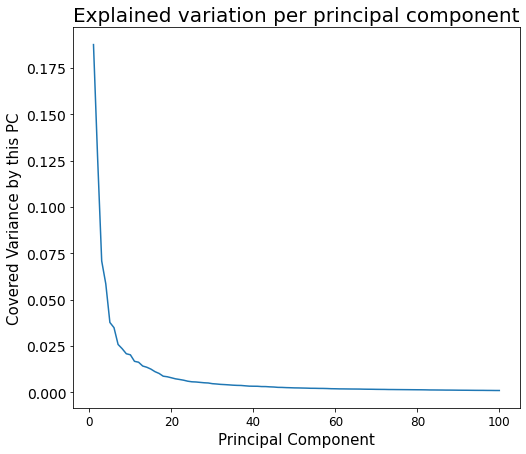

Explained variation per principal component for the first ten PCs: [0.18756015 0.12677269 0.07084639 0.05847021 0.03765644 0.03485494
 0.02578891 0.02348846 0.02078483 0.02020834 0.01669565 0.01620448
 0.01416225 0.01349809 0.01249936 0.01111477 0.01015756 0.00867646
 0.00836132 0.00781394]
0.9019115414677887


In [25]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=100)
X = data.drop(columns=['class'])
y = data['class'].to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
pca.fit(X, y)
xs = np.array(range(1,101))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.show()
print('Explained variation per principal component for the first ten PCs: {}'.format(pca.explained_variance_ratio_[0:20]))
print(sum(pca.explained_variance_ratio_[0:80]))

### PCA (Principal Component Analysis) with whitening

In [29]:
from sklearn.decomposition import PCA

def PCA_W(X_train, y_train, X_test):
  pca = PCA(n_components=80, random_state=0, whiten=True)
  pca.fit(X_train, y_train)
  reduced_X_train = pca.transform(X_train)
  reduced_X_test = pca.transform(X_test)
  return reduced_X_train, reduced_X_test

PCA_W_reduced_X_train, PCA_W_reduced_X_test = PCA_W(X_train, y_train, X_test)
print(PCA_W_reduced_X_train.shape, PCA_W_reduced_X_test.shape)

(680, 80) (76, 80)


### PCA (Principal Component Analysis) without withening

In [30]:
from sklearn.decomposition import PCA

def PCA_N_W(X_train, y_train, X_test):
  pca = PCA(n_components=80, random_state=0, whiten=False)
  pca.fit(X_train, y_train)
  reduced_X_train = pca.transform(X_train)
  reduced_X_test = pca.transform(X_test)
  return reduced_X_train, reduced_X_test

PCA_N_W_reduced_X_train, PCA_N_W_reduced_X_test = PCA_W(X_train, y_train, X_test)
print(PCA_N_W_reduced_X_train.shape, PCA_N_W_reduced_X_test.shape)

(680, 80) (76, 80)


### Sequential Backward Feature Elimination (with SVR as model)

In [31]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

def SBFE(X_train, y_train, X_test, classifier=SVR(kernel="linear")):
  sfs = RFE(classifier, n_features_to_select=10)
  sfs.fit(X_train, y_train)
  reduced_X_train = sfs.transform(X_train)
  reduced_X_test = sfs.transform(X_test)
  return reduced_X_train, reduced_X_test

SBFE_reduced_X_train, SBFE_reduced_X_test = SBFE(X_train, y_train, X_test)
print(SBFE_reduced_X_train.shape, SBFE_reduced_X_test.shape)

(680, 10) (76, 10)


### Autoencoders

Epoch 1/50
77/77 [==============================] - 1s 6ms/step - loss: 0.6002 - val_loss: 0.4202
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4201 - val_loss: 0.4185
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4185 - val_loss: 0.4176
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4156 - val_loss: 0.4158
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4165 - val_loss: 0.4133
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4134 - val_loss: 0.4098
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4118 - val_loss: 0.4074
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4099 - val_loss: 0.4052
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4070 - val_loss: 0.4039
Epoch 10/50
77/77 [==============================] - 0s 4ms/step - loss: 0.4066 - val_loss: 0.4025
Epoch 11/50
77/77 [

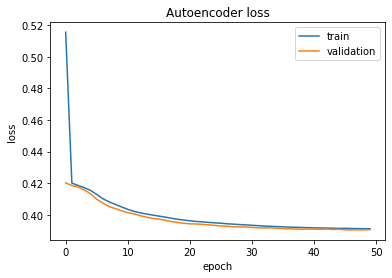

(680, 10) (76, 10)


In [32]:
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input

def AutoEncoder(X_train, y_train, X_test):
  encoding_dim = 10

  input_data = Input(shape=(X_train.shape[1],))
  # mid_encode = Dense(len(X_train[0]), activation='relu')(input_data)
  encoded = Dense(encoding_dim, activation='relu')(input_data)
  decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
  autoencoder = Model(input_data, decoded)
  autoencoder.compile(optimizer='adam',
                      loss='binary_crossentropy')
  
  hist_auto = autoencoder.fit(X_train, X_train,
                  epochs=50,
                  # batch_size=4,
                  # batch_size=256,
                  batch_size=8,
                  shuffle=True,
                  validation_split=0.1)

  plt.figure()
  plt.plot(hist_auto.history['loss'])
  plt.plot(hist_auto.history['val_loss'])
  plt.title('Autoencoder loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

  encoder = Model(input_data, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))

  encoded_X_train = encoder.predict(X_train)
  encoded_X_test = encoder.predict(X_test)
  return encoded_X_train, encoded_X_test

AE_reduced_X_train, AE_reduced_X_test = AutoEncoder(X_train, y_train, X_test)
print(AE_reduced_X_train.shape, AE_reduced_X_test.shape)

## Evaluation Metrics
1. Accuracy
2. Confusion Matrix
3. ROC Curve
4. Area Under Curve(AUC)
5. F1 Score

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, \
                            roc_auc_score, f1_score, roc_curve

def evaluate_model(model_clf_predictor, X_train, y_train, X_test, y_test, is_clf=True):
  model_clf, predicted_y = model_clf_predictor(X_train, y_train, X_test)
  true_y = list(y_test)
  accuracy = accuracy_score(true_y, predicted_y)
  print("Accuracy: {}".format(accuracy))
  conf_matrix = confusion_matrix(true_y, predicted_y)
  print("Confusion Matrix:")
  print(conf_matrix)
  if is_clf:
    print("ROC Curve:")
    plot_roc_curve(model_clf, X_test, y_test)
    plt.show()
    auc = roc_auc_score(y_test, model_clf.predict_proba(X_test)[:, 1])
    print("AUC: {}".format(auc))
  else:
    print("ROC Curve:")
    tp, fp, thresholds = roc_curve(y_test, predicted_y)
    plt.plot(tp, fp)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    auc = roc_auc_score(y_test, predicted_y)
    print("AUC: {}".format(auc))
  f1 = f1_score(true_y, predicted_y, average='binary')
  print("F1 Score: {}".format(f1))
  print("______________________________")

def evaluate_model_with_lda(model_clf_predictor, is_clf=True):
  print("Feature reduction by LDA")
  evaluate_model(model_clf_predictor, LDA_reduced_X_train, y_train, 
                 LDA_reduced_X_test, y_test, is_clf)

def evaluate_model_with_ica(model_clf_predictor, is_clf=True):
  print("Feature reduction by ICA")
  evaluate_model(model_clf_predictor, ICA_reduced_X_train, y_train, 
                 ICA_reduced_X_test, y_test, is_clf)

def evaluate_model_with_white_pca(model_clf_predictor, is_clf=True):
  print("Feature reduction by PCA with Withening")
  evaluate_model(model_clf_predictor, PCA_W_reduced_X_train, y_train, 
                 PCA_W_reduced_X_test, y_test, is_clf)

def evaluate_model_with_regular_pca(model_clf_predictor, is_clf=True):
  print("Feature reduction by PCA without withening")
  evaluate_model(model_clf_predictor, PCA_N_W_reduced_X_train, y_train, 
                 PCA_N_W_reduced_X_test, y_test, is_clf)

def evaluate_model_with_sbfe(model_clf_predictor, is_clf=True):
  print("Feature reduction by Sequential Backward Feature Elimination")
  evaluate_model(model_clf_predictor, SBFE_reduced_X_train, y_train, 
                 SBFE_reduced_X_test, y_test, is_clf)

def evaluate_model_with_autoencoders(model_clf_predictor, is_clf=True):
  print("Feature reduction by AutoEncoders")
  evaluate_model(model_clf_predictor, AE_reduced_X_train, y_train, 
                 AE_reduced_X_test, y_test, is_clf)

### K-Fold Cross Validation

In [34]:
from sklearn.model_selection import KFold

def k_fold_cross_validation(dimension_reduction, model_predictor):
  kfold = KFold(5, True, 1)
  accuracies = []
  for train, test in kfold.split(data):
    train_data = data.iloc[train, :]
    test_data = data.iloc[test, :]
    y_train = train_data['class'].to_numpy()
    X_train = train_data.drop(columns=['class'])
    y_test = test_data['class'].to_numpy()
    X_test = test_data.drop(columns=['class'])
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    reduced_X_train, reduced_X_test = dimension_reduction(X_train, y_train, X_test)
    _, predicted_y = model_predictor(reduced_X_train, y_train, reduced_X_test)
    true_y = list(y_test)
    accuracy = accuracy_score(true_y, predicted_y)
    accuracies.append(accuracy)
  print("Accuracies Mean: {}".format(np.mean(accuracies)))
  print("Accuracies std: {}".format(np.std(accuracies)))

## Classificaiton methods


### Generative Classifiers

#### Bayes classifier with Parzen Window for probability density

Feature reduction by LDA
Accuracy: 0.5921052631578947
Confusion Matrix:
[[ 9 12]
 [19 36]]
ROC Curve:


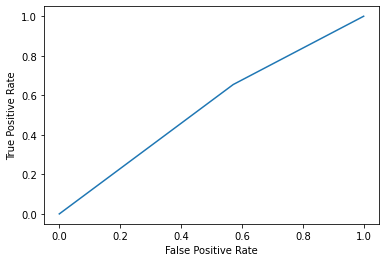

AUC: 0.5415584415584416
F1 Score: 0.6990291262135923
______________________________
Feature reduction by ICA
Accuracy: 0.7236842105263158
Confusion Matrix:
[[ 0 21]
 [ 0 55]]
ROC Curve:


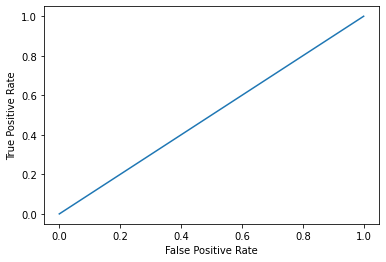

AUC: 0.5
F1 Score: 0.8396946564885496
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.881578947368421
Confusion Matrix:
[[17  4]
 [ 5 50]]
ROC Curve:


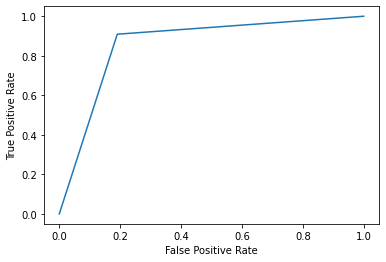

AUC: 0.8593073593073594
F1 Score: 0.9174311926605504
______________________________
Feature reduction by PCA without withening
Accuracy: 0.881578947368421
Confusion Matrix:
[[17  4]
 [ 5 50]]
ROC Curve:


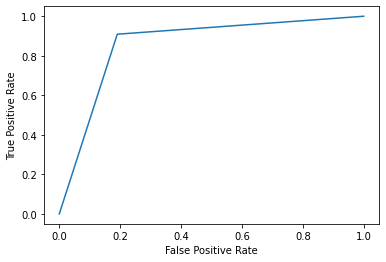

AUC: 0.8593073593073594
F1 Score: 0.9174311926605504
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.7236842105263158
Confusion Matrix:
[[ 0 21]
 [ 0 55]]
ROC Curve:


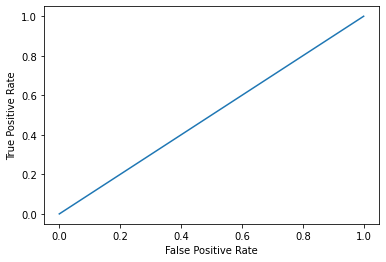

AUC: 0.5
F1 Score: 0.8396946564885496
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.881578947368421
Confusion Matrix:
[[15  6]
 [ 3 52]]
ROC Curve:


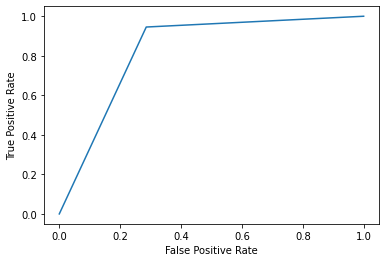

AUC: 0.8298701298701299
F1 Score: 0.920353982300885
______________________________


In [35]:
import math
from sklearn.neighbors import KernelDensity

def get_parzen_prob_log(train_samples, test_samples):
  parzen = KernelDensity()
  parzen.fit(train_samples)
  return parzen, parzen.score_samples(test_samples)

def Parzen(X_train, y_train, X_test):
  y_train = list(y_train)
  class_0 = [X_train[i] for i in range(len(X_train)) if y_train[i] == 0]
  class_1 = [X_train[i] for i in range(len(X_train)) if y_train[i] == 1]
  prob_1 = sum(y_train)/len(y_train)
  prob_0 = 1 - prob_1
  zero_model, zero_scores = get_parzen_prob_log(class_0, X_test)
  one_model, one_scores = get_parzen_prob_log(class_1, X_test)
  score_0 = zero_scores + [math.log(prob_0)] * len(X_test)
  score_1 = one_scores + [math.log(prob_1)] * len(X_test)
  labels = [1 if score_1[i] > score_0[i] else 0 for i in range(len(X_test))]
  probs = [abs(score_1[i]) / (abs(score_0[i]) + abs(score_1[i])) for i in range(len(X_test))]
  return None, labels

evaluate_model_with_lda(Parzen, False)
evaluate_model_with_ica(Parzen, False)
evaluate_model_with_white_pca(Parzen, False)
evaluate_model_with_regular_pca(Parzen, False)
evaluate_model_with_sbfe(Parzen, False)
evaluate_model_with_autoencoders(Parzen, False)

#### Bayes classifier with KNN for probability density

Feature reduction by LDA
Accuracy: 0.5921052631578947
Confusion Matrix:
[[ 9 12]
 [19 36]]
ROC Curve:


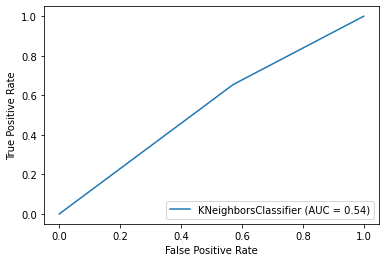

AUC: 0.5415584415584416
F1 Score: 0.6990291262135923
______________________________
Feature reduction by ICA
Accuracy: 0.868421052631579
Confusion Matrix:
[[15  6]
 [ 4 51]]
ROC Curve:


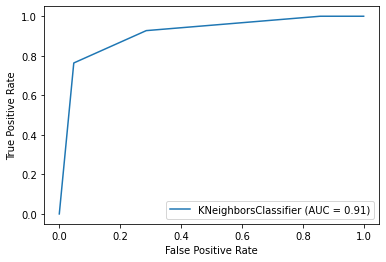

AUC: 0.912987012987013
F1 Score: 0.9107142857142856
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.9210526315789473
Confusion Matrix:
[[18  3]
 [ 3 52]]
ROC Curve:


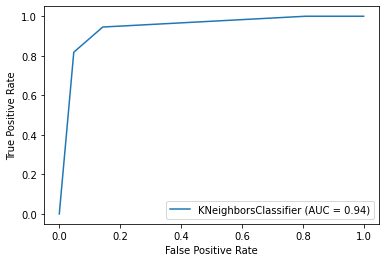

AUC: 0.9424242424242425
F1 Score: 0.9454545454545454
______________________________
Feature reduction by PCA without withening
Accuracy: 0.9210526315789473
Confusion Matrix:
[[18  3]
 [ 3 52]]
ROC Curve:


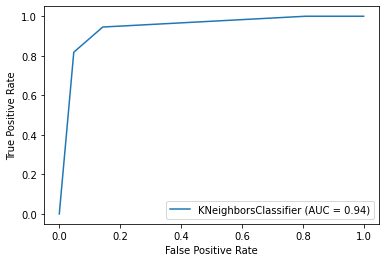

AUC: 0.9424242424242425
F1 Score: 0.9454545454545454
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.7368421052631579
Confusion Matrix:
[[ 9 12]
 [ 8 47]]
ROC Curve:


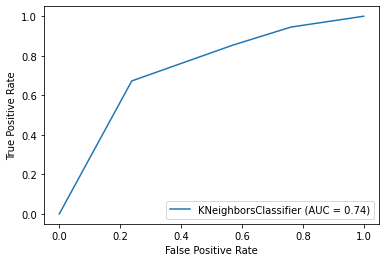

AUC: 0.7376623376623376
F1 Score: 0.8245614035087718
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.8552631578947368
Confusion Matrix:
[[16  5]
 [ 6 49]]
ROC Curve:


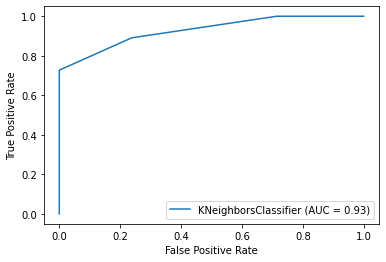

AUC: 0.9285714285714286
F1 Score: 0.8990825688073394
______________________________


In [36]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, y_train, X_test):
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)
  return neigh, neigh.predict(X_test)

evaluate_model_with_lda(KNN)
evaluate_model_with_ica(KNN)
evaluate_model_with_white_pca(KNN)
evaluate_model_with_regular_pca(KNN)
evaluate_model_with_sbfe(KNN)
evaluate_model_with_autoencoders(KNN)

#### Gaussian Mixture Model (GMM)

Feature reduction by LDA
Accuracy: 0.4473684210526316
Confusion Matrix:
[[13  8]
 [34 21]]
ROC Curve:


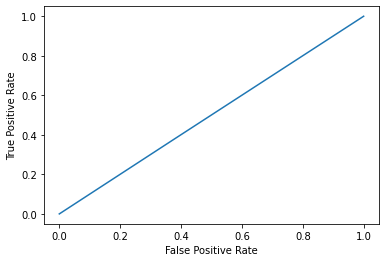

AUC: 0.5004329004329005
F1 Score: 0.5000000000000001
______________________________
Feature reduction by ICA
Accuracy: 0.7631578947368421
Confusion Matrix:
[[16  5]
 [13 42]]
ROC Curve:


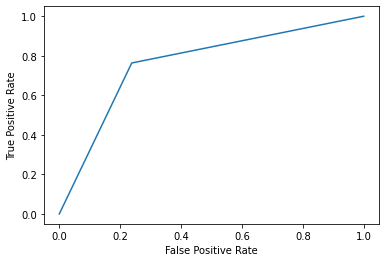

AUC: 0.7627705627705628
F1 Score: 0.8235294117647058
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.7631578947368421
Confusion Matrix:
[[ 4 17]
 [ 1 54]]
ROC Curve:


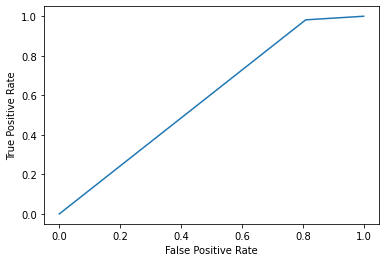

AUC: 0.5861471861471862
F1 Score: 0.8571428571428571
______________________________
Feature reduction by PCA without withening
Accuracy: 0.7631578947368421
Confusion Matrix:
[[ 4 17]
 [ 1 54]]
ROC Curve:


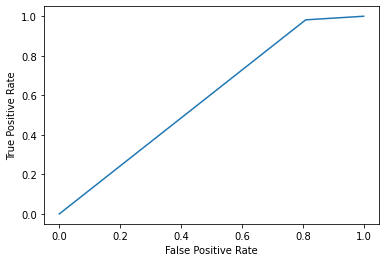

AUC: 0.5861471861471862
F1 Score: 0.8571428571428571
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.8157894736842105
Confusion Matrix:
[[11 10]
 [ 4 51]]
ROC Curve:


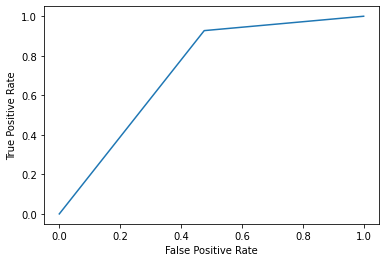

AUC: 0.7255411255411255
F1 Score: 0.8793103448275862
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.75
Confusion Matrix:
[[15  6]
 [13 42]]
ROC Curve:


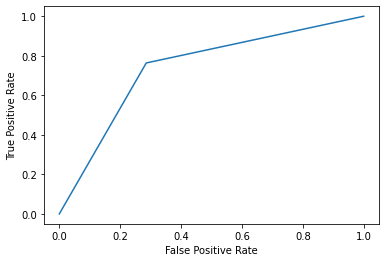

AUC: 0.738961038961039
F1 Score: 0.8155339805825242
______________________________


In [37]:
import math
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

def get_gmm_prob(train_samples, test_samples):
  comp_num = 8
  gmm = GaussianMixture(n_components=comp_num, random_state=0)
  gmm.fit(train_samples)
  probabilities = [multivariate_normal.pdf(test_samples, mean=gmm.means_[i], cov=gmm.covariances_[i]) for i in range(comp_num)]
  pred_prob = [0 for _ in probabilities[0]]
  for i in range(comp_num):
      for j in range(len(pred_prob)):
          pred_prob[j] = pred_prob[j] + probabilities[i][j]
  return gmm, pred_prob # Solution?

def GMM(X_train, y_train, X_test):
  class_0 = [X_train[i] for i in range(len(X_train)) if y_train[i] == 0]
  class_1 = [X_train[i] for i in range(len(X_train)) if y_train[i] == 1]
  prob_1 = sum(y_train)/len(y_train)
  prob_0 = 1 - prob_1
  zero_model, zero_score = get_gmm_prob(class_0, X_test)
  one_model, one_score = get_gmm_prob(class_1, X_test)
  score_0 = zero_score + [math.log(prob_0)] * len(X_test)
  score_1 = one_score + [math.log(prob_1)] * len(X_test)
  labels = [1 if score_1[i] > score_0[i] else 0 for i in range(len(X_test))]
  return None, labels

evaluate_model_with_lda(GMM, False)
evaluate_model_with_ica(GMM, False)
evaluate_model_with_white_pca(GMM, False)
evaluate_model_with_regular_pca(GMM, False)
evaluate_model_with_sbfe(GMM, False)
evaluate_model_with_autoencoders(GMM, False)

### Discriminative Algorithms

#### Logistic Regression

Feature reduction by LDA
Accuracy: 0.5921052631578947
Confusion Matrix:
[[ 9 12]
 [19 36]]
ROC Curve:


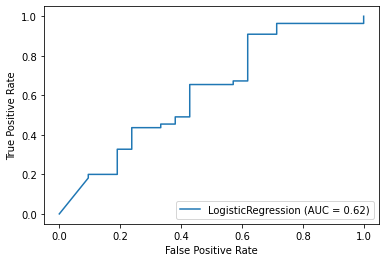

AUC: 0.6173160173160173
F1 Score: 0.6990291262135923
______________________________
Feature reduction by ICA
Accuracy: 0.7236842105263158
Confusion Matrix:
[[ 0 21]
 [ 0 55]]
ROC Curve:


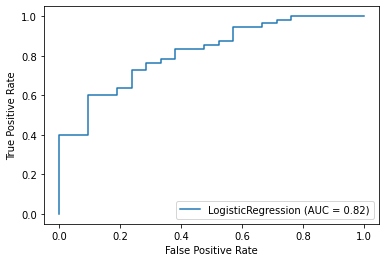

AUC: 0.8164502164502164
F1 Score: 0.8396946564885496
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.7236842105263158
Confusion Matrix:
[[ 8 13]
 [ 8 47]]
ROC Curve:


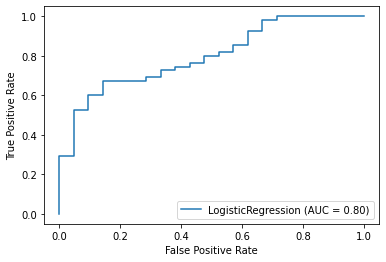

AUC: 0.7974025974025974
F1 Score: 0.817391304347826
______________________________
Feature reduction by PCA without withening
Accuracy: 0.7236842105263158
Confusion Matrix:
[[ 8 13]
 [ 8 47]]
ROC Curve:


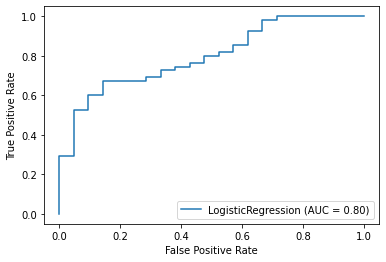

AUC: 0.7974025974025974
F1 Score: 0.817391304347826
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.7631578947368421
Confusion Matrix:
[[ 5 16]
 [ 2 53]]
ROC Curve:


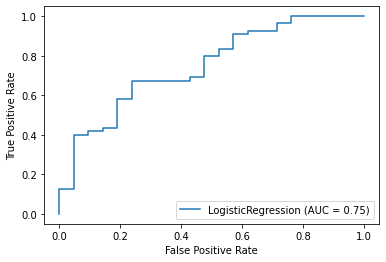

AUC: 0.7480519480519481
F1 Score: 0.8548387096774193
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.8026315789473685
Confusion Matrix:
[[10 11]
 [ 4 51]]
ROC Curve:


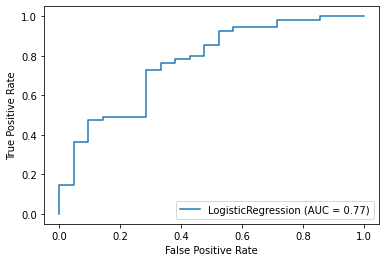

AUC: 0.7662337662337663
F1 Score: 0.8717948717948718
______________________________


In [38]:
from sklearn.linear_model import LogisticRegression

def LogisticReg(X_train, y_train, X_test):
  logistic_clf = LogisticRegression(random_state=42)
  logistic_clf.fit(X_train, y_train)
  return logistic_clf, logistic_clf.predict(X_test)

evaluate_model_with_lda(LogisticReg)
evaluate_model_with_ica(LogisticReg)
evaluate_model_with_white_pca(LogisticReg)
evaluate_model_with_regular_pca(LogisticReg)
evaluate_model_with_sbfe(LogisticReg)
evaluate_model_with_autoencoders(LogisticReg)

#### Support Vector Machine (SVM)

Feature reduction by LDA
Accuracy: 0.5526315789473685
Confusion Matrix:
[[ 3 18]
 [16 39]]
ROC Curve:


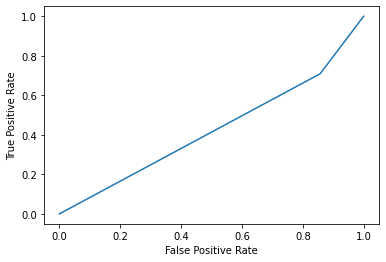

AUC: 0.425974025974026
F1 Score: 0.6964285714285715
______________________________
Feature reduction by ICA
Accuracy: 0.8026315789473685
Confusion Matrix:
[[ 9 12]
 [ 3 52]]
ROC Curve:


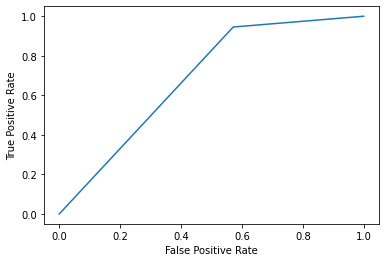

AUC: 0.6870129870129871
F1 Score: 0.8739495798319329
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.8026315789473685
Confusion Matrix:
[[ 9 12]
 [ 3 52]]
ROC Curve:


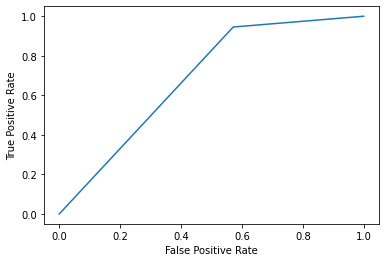

AUC: 0.6870129870129871
F1 Score: 0.8739495798319329
______________________________
Feature reduction by PCA without withening
Accuracy: 0.8026315789473685
Confusion Matrix:
[[ 9 12]
 [ 3 52]]
ROC Curve:


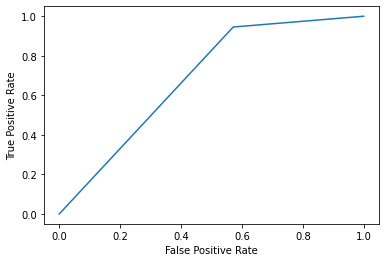

AUC: 0.6870129870129871
F1 Score: 0.8739495798319329
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.7763157894736842
Confusion Matrix:
[[ 5 16]
 [ 1 54]]
ROC Curve:


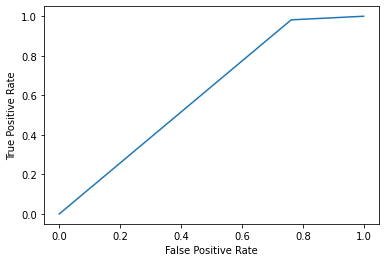

AUC: 0.60995670995671
F1 Score: 0.864
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.7894736842105263
Confusion Matrix:
[[ 8 13]
 [ 3 52]]
ROC Curve:


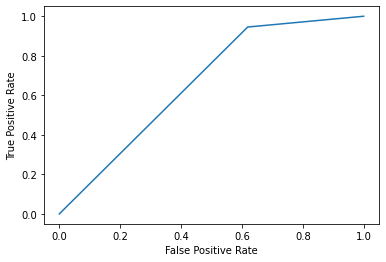

AUC: 0.6632034632034631
F1 Score: 0.8666666666666666
______________________________


In [39]:
from sklearn import svm

def SVMClassifier(X_train, y_train, X_test):
  svm_clf = svm.SVC()
  svm_clf.fit(X_train, y_train)
  return svm, svm_clf.predict(X_test)

evaluate_model_with_lda(SVMClassifier, False)
evaluate_model_with_ica(SVMClassifier, False)
evaluate_model_with_white_pca(SVMClassifier, False)
evaluate_model_with_regular_pca(SVMClassifier, False)
evaluate_model_with_sbfe(SVMClassifier, False)
evaluate_model_with_autoencoders(SVMClassifier, False)

#### Decision Tree

Feature reduction by LDA
Accuracy: 0.5921052631578947
Confusion Matrix:
[[ 9 12]
 [19 36]]
ROC Curve:


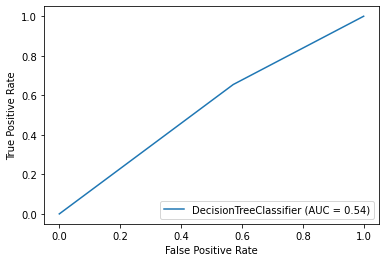

AUC: 0.5415584415584416
F1 Score: 0.6990291262135923
______________________________
Feature reduction by ICA
Accuracy: 0.75
Confusion Matrix:
[[14  7]
 [12 43]]
ROC Curve:


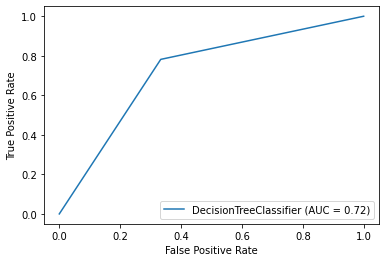

AUC: 0.7242424242424244
F1 Score: 0.819047619047619
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.7105263157894737
Confusion Matrix:
[[ 6 15]
 [ 7 48]]
ROC Curve:


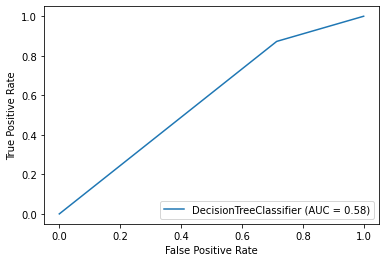

AUC: 0.5792207792207792
F1 Score: 0.8135593220338982
______________________________
Feature reduction by PCA without withening
Accuracy: 0.7105263157894737
Confusion Matrix:
[[ 6 15]
 [ 7 48]]
ROC Curve:


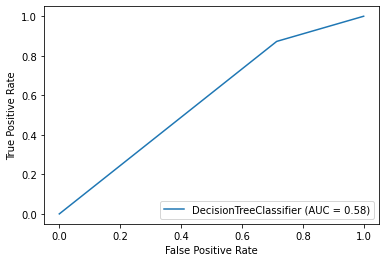

AUC: 0.5792207792207792
F1 Score: 0.8135593220338982
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.6973684210526315
Confusion Matrix:
[[ 9 12]
 [11 44]]
ROC Curve:


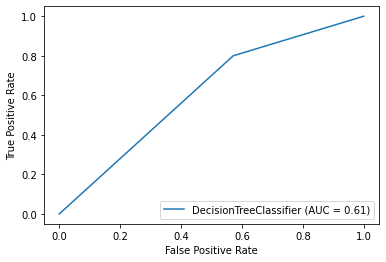

AUC: 0.6142857142857143
F1 Score: 0.7927927927927927
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.75
Confusion Matrix:
[[13  8]
 [11 44]]
ROC Curve:


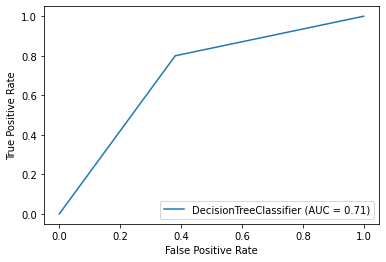

AUC: 0.7095238095238096
F1 Score: 0.8224299065420562
______________________________


In [40]:
from sklearn import tree

def DecisionTree(X_train, y_train, X_test):
  decision_tree = tree.DecisionTreeClassifier(random_state=42)
  decision_tree = decision_tree.fit(X_train, y_train)
  return decision_tree, decision_tree.predict(X_test)

evaluate_model_with_lda(DecisionTree)
evaluate_model_with_ica(DecisionTree)
evaluate_model_with_white_pca(DecisionTree)
evaluate_model_with_regular_pca(DecisionTree)
evaluate_model_with_sbfe(DecisionTree)
evaluate_model_with_autoencoders(DecisionTree)

#### KNN

Feature reduction by LDA
Accuracy: 0.5921052631578947
Confusion Matrix:
[[ 9 12]
 [19 36]]
ROC Curve:


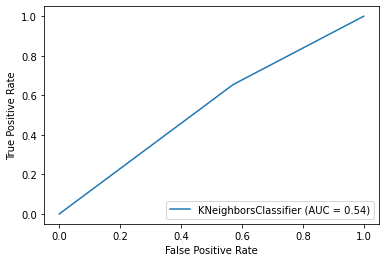

AUC: 0.5415584415584416
F1 Score: 0.6990291262135923
______________________________
Feature reduction by ICA
Accuracy: 0.868421052631579
Confusion Matrix:
[[15  6]
 [ 4 51]]
ROC Curve:


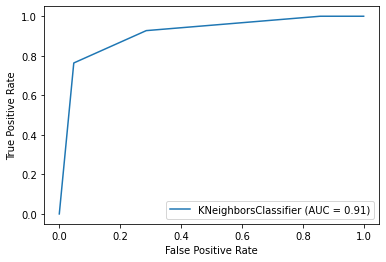

AUC: 0.912987012987013
F1 Score: 0.9107142857142856
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.9210526315789473
Confusion Matrix:
[[18  3]
 [ 3 52]]
ROC Curve:


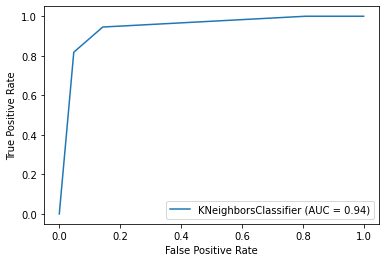

AUC: 0.9424242424242425
F1 Score: 0.9454545454545454
______________________________
Feature reduction by PCA without withening
Accuracy: 0.9210526315789473
Confusion Matrix:
[[18  3]
 [ 3 52]]
ROC Curve:


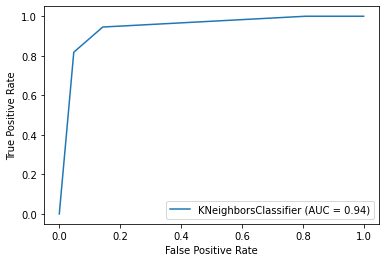

AUC: 0.9424242424242425
F1 Score: 0.9454545454545454
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.7368421052631579
Confusion Matrix:
[[ 9 12]
 [ 8 47]]
ROC Curve:


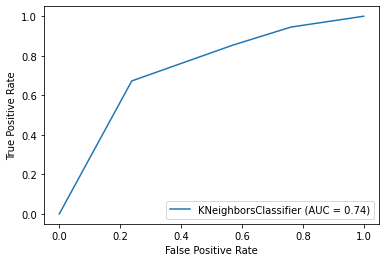

AUC: 0.7376623376623376
F1 Score: 0.8245614035087718
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.8552631578947368
Confusion Matrix:
[[16  5]
 [ 6 49]]
ROC Curve:


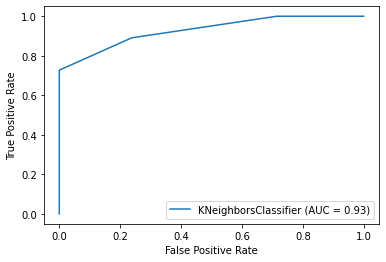

AUC: 0.9285714285714286
F1 Score: 0.8990825688073394
______________________________


In [41]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, y_train, X_test):
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)
  return neigh, neigh.predict(X_test)

evaluate_model_with_lda(KNN)
evaluate_model_with_ica(KNN)
evaluate_model_with_white_pca(KNN)
evaluate_model_with_regular_pca(KNN)
evaluate_model_with_sbfe(KNN)
evaluate_model_with_autoencoders(KNN)

#### Multi-layer Perceptron (MLP)

Feature reduction by LDA
Accuracy: 0.5394736842105263
Confusion Matrix:
[[12  9]
 [26 29]]
ROC Curve:


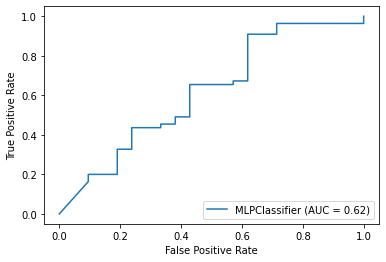

AUC: 0.6164502164502164
F1 Score: 0.6236559139784946
______________________________
Feature reduction by ICA
Accuracy: 0.8289473684210527
Confusion Matrix:
[[13  8]
 [ 5 50]]
ROC Curve:


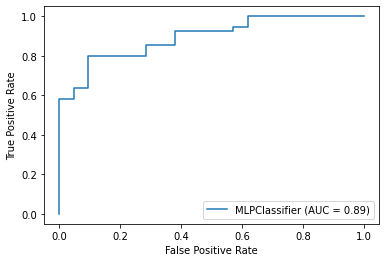

AUC: 0.8943722943722944
F1 Score: 0.8849557522123893
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.8421052631578947
Confusion Matrix:
[[13  8]
 [ 4 51]]
ROC Curve:


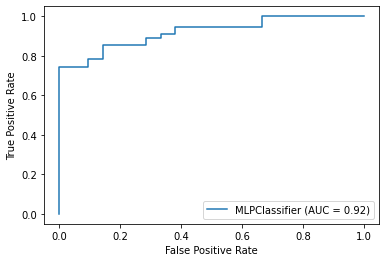

AUC: 0.9194805194805195
F1 Score: 0.8947368421052632
______________________________
Feature reduction by PCA without withening
Accuracy: 0.8421052631578947
Confusion Matrix:
[[13  8]
 [ 4 51]]
ROC Curve:


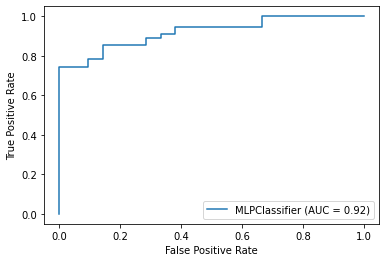

AUC: 0.9194805194805195
F1 Score: 0.8947368421052632
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.7763157894736842
Confusion Matrix:
[[ 6 15]
 [ 2 53]]
ROC Curve:


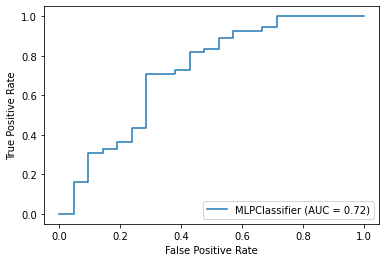

AUC: 0.7186147186147186
F1 Score: 0.8617886178861789
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.7894736842105263
Confusion Matrix:
[[10 11]
 [ 5 50]]
ROC Curve:


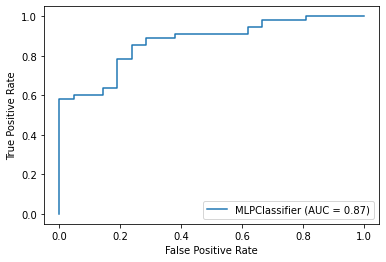

AUC: 0.8701298701298701
F1 Score: 0.8620689655172413
______________________________


In [42]:
from sklearn.neural_network import MLPClassifier

def MLP(X_train, y_train, X_test):
  mlp_clf = MLPClassifier(random_state=42, max_iter=3000)
  mlp_clf = mlp_clf.fit(X_train, y_train)
  return mlp_clf, mlp_clf.predict(X_test)

evaluate_model_with_lda(MLP)
evaluate_model_with_ica(MLP)
evaluate_model_with_white_pca(MLP)
evaluate_model_with_regular_pca(MLP)
evaluate_model_with_sbfe(MLP)
evaluate_model_with_autoencoders(MLP)

#### Radial Basis Function kernel (RBF)

Feature reduction by LDA
Accuracy: 0.5921052631578947
Confusion Matrix:
[[ 9 12]
 [19 36]]
ROC Curve:


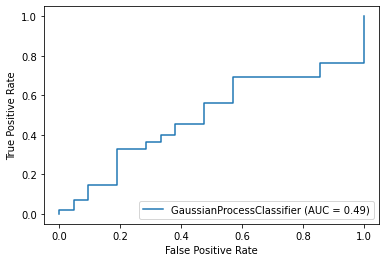

AUC: 0.48917748917748916
F1 Score: 0.6990291262135923
______________________________
Feature reduction by ICA
Accuracy: 0.8026315789473685
Confusion Matrix:
[[ 9 12]
 [ 3 52]]
ROC Curve:


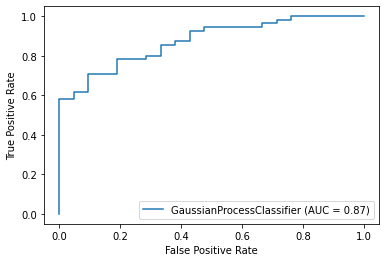

AUC: 0.8744588744588744
F1 Score: 0.8739495798319329
______________________________
Feature reduction by PCA with Withening
Accuracy: 0.8026315789473685
Confusion Matrix:
[[ 9 12]
 [ 3 52]]
ROC Curve:


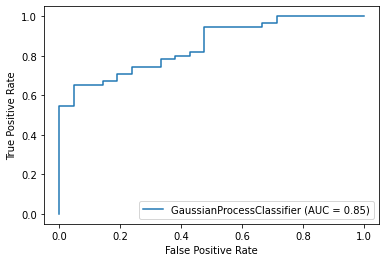

AUC: 0.8510822510822511
F1 Score: 0.8739495798319329
______________________________
Feature reduction by PCA without withening
Accuracy: 0.8026315789473685
Confusion Matrix:
[[ 9 12]
 [ 3 52]]
ROC Curve:


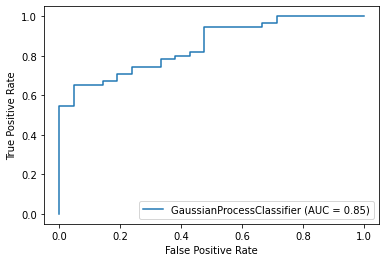

AUC: 0.8510822510822511
F1 Score: 0.8739495798319329
______________________________
Feature reduction by Sequential Backward Feature Elimination
Accuracy: 0.7894736842105263
Confusion Matrix:
[[ 8 13]
 [ 3 52]]
ROC Curve:


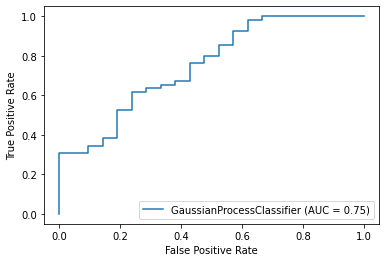

AUC: 0.7515151515151516
F1 Score: 0.8666666666666666
______________________________
Feature reduction by AutoEncoders
Accuracy: 0.7236842105263158
Confusion Matrix:
[[ 0 21]
 [ 0 55]]
ROC Curve:


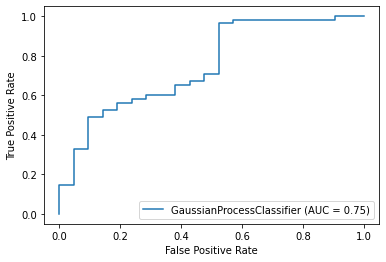

AUC: 0.748051948051948
F1 Score: 0.8396946564885496
______________________________


In [43]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

def RBFClassifier(X_train, y_train, X_test):
  kernel = 1.0 * RBF(1.0)
  gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
  gpc = gpc.fit(X_train, y_train)
  return gpc, gpc.predict(X_test)

evaluate_model_with_lda(RBFClassifier)
evaluate_model_with_ica(RBFClassifier)
evaluate_model_with_white_pca(RBFClassifier)
evaluate_model_with_regular_pca(RBFClassifier)
evaluate_model_with_sbfe(RBFClassifier)
evaluate_model_with_autoencoders(RBFClassifier)

## K-Fold Cross validation results on final model

In [48]:
k_fold_cross_validation(PCA_W, KNN)

Accuracies Mean: 0.8928720808644126
Accuracies std: 0.023764576186638988


## Bagging

### Our implementation of bagging with different classifiers

In [46]:
from random import sample

def BaggingClassifier(X_train, y_train, X_test):
  # fraction = 1.0
  # data = [np.append(X_train[i], y_train[i]) for i in range(len(X_train[0]))]
  # shuffled_train_data = sample(data, round(fraction * len(data)))
  # y_train = [shuffled_train_data[i][-1] for i in range(len(shuffled_train_data))]
  # X_train = [shuffled_train_data[i][:-1] for i in range(len(shuffled_train_data))]
  models = []
  mlp_clf = MLPClassifier(random_state=42, max_iter=3000)
  mlp_clf = mlp_clf.fit(X_train, y_train)
  models.append(mlp_clf)
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)
  models.append(neigh)
  svm_clf = svm.SVC()
  svm_clf.fit(X_train, y_train)
  models.append(svm_clf)
  predictions = []
  for model in models:
    model_prediction = model.predict(X_test)
    predictions.append(model_prediction)
  final_labels = []
  for index in range(len(X_test)):
    predictions_map = {0: 0, 1: 0}
    for model_index in range(len(models)):
      predictions_map[predictions[model_index][index]] += 1
    if predictions_map[0] > predictions_map[1]:
      final_labels.append(0)
    else:
      final_labels.append(1)
  return None, final_labels

k_fold_cross_validation(PCA_W, BaggingClassifier)

Accuracies Mean: 0.8955036598117811
Accuracies std: 0.022704080633762985


### `BaggingClassifier` of `sklearn` (Baggin)


In [55]:
from sklearn.ensemble import BaggingClassifier

def SklearnBaggingClassifier(X_train, y_train, X_test):
  bagging_clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),\
                              n_estimators=10, random_state=42).fit(X_train, y_train)
  return bagging_clf, bagging_clf.predict(X_test)

k_fold_cross_validation(PCA_W, SklearnBaggingClassifier)

Accuracies Mean: 0.8981962356221679
Accuracies std: 0.03015506053129796


In [58]:
def DTSklearnBaggingClassifier(X_train, y_train, X_test):
  bagging_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),\
                              n_estimators=10, random_state=42).fit(X_train, y_train)
  return bagging_clf, bagging_clf.predict(X_test)

print("Bagging:")
k_fold_cross_validation(PCA_W, DTSklearnBaggingClassifier)
print("Single Decision Tree")
k_fold_cross_validation(PCA_W, DecisionTree)

Bagging:
Accuracies Mean: 0.8187521784593935
Accuracies std: 0.029363020942906982
Single Decision Tree
Accuracies Mean: 0.773841059602649
Accuracies std: 0.043823849686266736


### `GradientBoostingClassifier` of `Sklearn` (Boosting)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

def SklearnBoostingClassifier(X_train, y_train, X_test):
  boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.4,\
                                 max_depth=4, random_state=42).fit(X_train, y_train)
  return boosting_clf, boosting_clf.predict(X_test)

k_fold_cross_validation(PCA_W, SklearnBoostingClassifier)

Accuracies Mean: 0.8571540606483096
Accuracies std: 0.028220723211463503
